# K Nearest Neighbors on the Iris dataset

In this notebook I am going to apply K Nearest Neighbors to the Iris dataset.

In [477]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as mt
import sklearn.datasets as datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [478]:
df = pd.read_csv('iris.csv')

In [479]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [481]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Need to:
* Drop the Id column
* Separate the Species column and transform it to numbers
* scale the features

In [482]:
df.drop('Id', axis=1, inplace=True)

In [483]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [484]:
df['Species'] = df['Species'].astype('category')

In [485]:
df.dtypes

SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [486]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [487]:
y = df['Species']
X = df.drop('Species', axis=1)

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [489]:
ss = StandardScaler()

In [490]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [491]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [492]:
knn = KNeighborsClassifier(n_neighbors=1)

In [493]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [494]:
y_pred = knn.predict(X_test)

In [495]:
print(mt.confusion_matrix(y_test, y_pred))
print(mt.classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 13  1]
 [ 0  0 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.93      0.96        14
          2       0.92      1.00      0.96        11

avg / total       0.98      0.97      0.97        38



In [496]:
max_k = 20
f1 = [0] * max_k
error_rate = [1000] * max_k
max_iter = 1000
for j in range(1,max_iter):
    for i in range(1,max_k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error_rate[i] = (1/j) * (error_rate[i]*(j-1) + np.mean(y_pred != y_test))
    print('Iteration {}/{}'.format(j,max_iter))

Iteration 1/1000
Iteration 2/1000
Iteration 3/1000
Iteration 4/1000
Iteration 5/1000
Iteration 6/1000
Iteration 7/1000
Iteration 8/1000
Iteration 9/1000
Iteration 10/1000
Iteration 11/1000
Iteration 12/1000
Iteration 13/1000
Iteration 14/1000
Iteration 15/1000
Iteration 16/1000
Iteration 17/1000
Iteration 18/1000
Iteration 19/1000
Iteration 20/1000
Iteration 21/1000
Iteration 22/1000
Iteration 23/1000
Iteration 24/1000
Iteration 25/1000
Iteration 26/1000
Iteration 27/1000
Iteration 28/1000
Iteration 29/1000
Iteration 30/1000
Iteration 31/1000
Iteration 32/1000
Iteration 33/1000
Iteration 34/1000
Iteration 35/1000
Iteration 36/1000
Iteration 37/1000
Iteration 38/1000
Iteration 39/1000
Iteration 40/1000
Iteration 41/1000
Iteration 42/1000
Iteration 43/1000
Iteration 44/1000
Iteration 45/1000
Iteration 46/1000
Iteration 47/1000
Iteration 48/1000
Iteration 49/1000
Iteration 50/1000
Iteration 51/1000
Iteration 52/1000
Iteration 53/1000
Iteration 54/1000
Iteration 55/1000
Iteration 56/1000
I

Iteration 438/1000
Iteration 439/1000
Iteration 440/1000
Iteration 441/1000
Iteration 442/1000
Iteration 443/1000
Iteration 444/1000
Iteration 445/1000
Iteration 446/1000
Iteration 447/1000
Iteration 448/1000
Iteration 449/1000
Iteration 450/1000
Iteration 451/1000
Iteration 452/1000
Iteration 453/1000
Iteration 454/1000
Iteration 455/1000
Iteration 456/1000
Iteration 457/1000
Iteration 458/1000
Iteration 459/1000
Iteration 460/1000
Iteration 461/1000
Iteration 462/1000
Iteration 463/1000
Iteration 464/1000
Iteration 465/1000
Iteration 466/1000
Iteration 467/1000
Iteration 468/1000
Iteration 469/1000
Iteration 470/1000
Iteration 471/1000
Iteration 472/1000
Iteration 473/1000
Iteration 474/1000
Iteration 475/1000
Iteration 476/1000
Iteration 477/1000
Iteration 478/1000
Iteration 479/1000
Iteration 480/1000
Iteration 481/1000
Iteration 482/1000
Iteration 483/1000
Iteration 484/1000
Iteration 485/1000
Iteration 486/1000
Iteration 487/1000
Iteration 488/1000
Iteration 489/1000
Iteration 49

Iteration 870/1000
Iteration 871/1000
Iteration 872/1000
Iteration 873/1000
Iteration 874/1000
Iteration 875/1000
Iteration 876/1000
Iteration 877/1000
Iteration 878/1000
Iteration 879/1000
Iteration 880/1000
Iteration 881/1000
Iteration 882/1000
Iteration 883/1000
Iteration 884/1000
Iteration 885/1000
Iteration 886/1000
Iteration 887/1000
Iteration 888/1000
Iteration 889/1000
Iteration 890/1000
Iteration 891/1000
Iteration 892/1000
Iteration 893/1000
Iteration 894/1000
Iteration 895/1000
Iteration 896/1000
Iteration 897/1000
Iteration 898/1000
Iteration 899/1000
Iteration 900/1000
Iteration 901/1000
Iteration 902/1000
Iteration 903/1000
Iteration 904/1000
Iteration 905/1000
Iteration 906/1000
Iteration 907/1000
Iteration 908/1000
Iteration 909/1000
Iteration 910/1000
Iteration 911/1000
Iteration 912/1000
Iteration 913/1000
Iteration 914/1000
Iteration 915/1000
Iteration 916/1000
Iteration 917/1000
Iteration 918/1000
Iteration 919/1000
Iteration 920/1000
Iteration 921/1000
Iteration 92

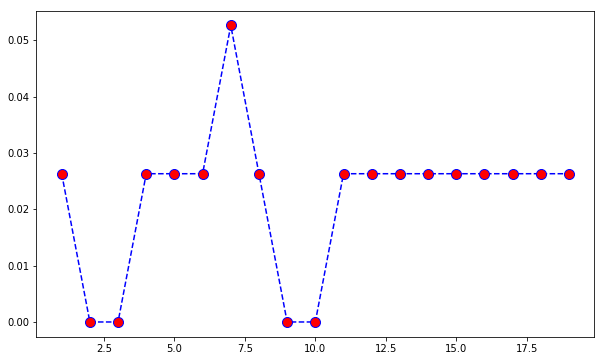

In [497]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.plot(range(1,max_k),
         error_rate[1:],
         color='blue',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red',
         markersize=10)
plt.show()

In [501]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(mt.confusion_matrix(y_test, y_pred))
print(mt.classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 14  0]
 [ 0  0 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        38



The optimum K is difficult to determine but seems to lie around k = 9-10 which give perfect prediction...

Let's test with k = 10 on the whole dataset.

In [503]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(ss.transform(X))
print(mt.confusion_matrix(y, y_pred))
print(mt.classification_report(y, y_pred))

[[50  0  0]
 [ 0 49  1]
 [ 0  3 47]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.98      0.96        50
          2       0.98      0.94      0.96        50

avg / total       0.97      0.97      0.97       150



Pretty amazing results if I may say so, it would be interesting to be able to test on more samples.